# Data Exploration

## Library imports

In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import importlib 

from pathlib import Path 

In [43]:
# import other libraries 
# check if jcds library is installed
package_name = "jcds"

if importlib.util.find_spec(package_name) is None:
    print(f" '{package_name}' not found. Installing from Github... ")
    subprocess.check_call(
        [
            sys.executable,
            "-m",
            "pip",
            "install",
            "https://github.com/junclemente/jcds.git",
        ]
    )
else:
    print(f" '{package_name}' is already installed.")

from jcds import eda as jeda
from jcds import reports as jrep

 'jcds' is already installed.


## Import dataset

In [44]:
data_folder = Path("../data")

df = pd.read_pickle(data_folder / "ews_dataset.pkl")

id_columns = ['cdscode', 'latitude', 'longitude', 'county']

df = df.drop(columns=id_columns)

df.head()

,virtual,magnet,yearroundyn,multilingual,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,N,N,N,N,394.0,92.4,73.9,22.8,2.3,1.0,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,N,N,N,N,284.0,95.1,67.8,21.5,3.5,0.0,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,N,N,N,Y,861.0,90.5,62.3,12.1,8.1,0.8,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,N,N,N,N,672.0,96.4,72.8,25.0,2.2,0.0,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,V,N,N,N,31.0,100.0,64.5,6.5,0.0,0.0,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


## Basic dataset info

In [45]:
jrep.data_info(df, show_columns=True)


SHAPE:
There are 1067 rows and 42 columns (0.55 MB).

DUPLICATES:
There are 6 duplicated rows.

COLUMNS/VARIABLES:
Column dType Summary:
 * object: 4
 * float: 38
There are 38 numerical (int/float/bool) variables.
 * Columns: ['cohortstudents', 'regular_hs_diploma_graduates_rate', 'met_uccsu_grad_reqs_rate', 'seal_of_biliteracy_rate', 'dropout_rate', 'still_enrolled_rate', 'chronicabsenteeismrate', 'eligible_cumulative_enrollment', 'unexcused_absences_percent', 'outofschool_suspension_absences_percent', 'percent__eligible_free_k12', 'frpm_count_k12', 'stu_tch_ratio', 'stu_adm_ratio', 'stu_psv_ratio', 'pct_associate', 'pct_bachelors', 'pct_bachelors_plus', 'pct_master', 'pct_master_plus', 'pct_doctorate', 'pct_juris_doctor', 'pct_no_degree', 'pct_experienced', 'pct_inexperienced', 'pct_first_year', 'pct_second_year', 'grade_retention_ratio', 'pct_hs_enrollment', 'pct_senior_cohort', 'pct_unsafe_gr11', 'pct_safe_gr11', 'pct_neutral_gr11', 'avg_safety_score', 'high_conn', 'low_conn', 'co

In [46]:
jrep.data_cardinality(df, show_columns=True)

CARDINALITY REPORT

Total columns analyzed: 42

[BINARY COLUMNS]
There are 1 binary columns.
 * Columns: ['yearroundyn']
There are 0 binary with nan.

[CONSTANT/NEAR CONSTANT COLUMNS]
There are 3 constant columns.
 * Columns: ['high_conn', 'low_conn', 'conn_ratio']
There are 4 near-constant columns with >= 95% of values being the same.
 * Columns: ['yearroundyn', 'high_conn', 'low_conn', 'conn_ratio']

[LOW CARDINALITY CATEGORICAL COLUMNS]
 * There are 4 low cardinality columns with <= 10 unique values.
Columns:
 * virtual: 3 unique values
 * magnet: 3 unique values
 * yearroundyn: 2 unique values
 * multilingual: 3 unique values

[HIGH CARDINALITY CATEGORICAL COLUMNS]
 * There are 0 high cardinality variables with >=90% unique values.


In [47]:
jrep.data_quality(df, show_columns=True)

DATA QUALITY REPORT

 * Total entries (rows * cols): 44814
 * Memory usage: 0.55 MB
 * Rows: 1067
 * Columns: 42

MISSING DATA:
 * Total entries: 3179 missing (7.1%)

ROWS:
----------
 * Rows missing any: 331
 * Rows missing all: 0

DUPLICATES: 6

COLUMNS:
----------------
Columns missing any: 35
	'pct_unsafe_gr11': 172 missing (16.1%)
	'pct_safe_gr11': 172 missing (16.1%)
	'pct_neutral_gr11': 172 missing (16.1%)
	'stu_psv_ratio': 164 missing (15.4%)
	'stu_adm_ratio': 157 missing (14.7%)
	'avg_safety_score': 123 missing (11.5%)
	'school_climate_index': 123 missing (11.5%)
	'stu_tch_ratio': 97 missing (9.1%)
	'pct_associate': 96 missing (9.0%)
	'pct_bachelors': 96 missing (9.0%)
	'pct_bachelors_plus': 96 missing (9.0%)
	'pct_master': 96 missing (9.0%)
	'pct_master_plus': 96 missing (9.0%)
	'pct_doctorate': 96 missing (9.0%)
	'pct_juris_doctor': 96 missing (9.0%)
	'pct_no_degree': 96 missing (9.0%)
	'pct_experienced': 96 missing (9.0%)
	'pct_inexperienced': 96 missing (9.0%)
	'pct_first_

In [64]:
# list features and target
target = "regular_hs_diploma_graduates_rate"
num_cols = df.select_dtypes(include='number').columns.to_list()

cat_cols = df.select_dtypes(exclude='number').columns.to_list()

In [65]:
df_num = df[num_cols].copy()

df_num.head()

,cohortstudents,regular_hs_diploma_graduates_rate,met_uccsu_grad_reqs_rate,seal_of_biliteracy_rate,dropout_rate,still_enrolled_rate,chronicabsenteeismrate,eligible_cumulative_enrollment,unexcused_absences_percent,outofschool_suspension_absences_percent,...,pct_hs_enrollment,pct_senior_cohort,pct_unsafe_gr11,pct_safe_gr11,pct_neutral_gr11,avg_safety_score,high_conn,low_conn,conn_ratio,school_climate_index
0,394.0,92.4,73.9,22.8,2.3,1.0,12.7,1841.0,23.5,0.5,...,1.00000,0.498894,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
1,284.0,95.1,67.8,21.5,3.5,0.0,70.3,1192.0,46.2,0.4,...,1.00000,0.501264,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
2,861.0,90.5,62.3,12.1,8.1,0.8,5.2,3281.0,24.1,0.0,...,1.00000,0.496276,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
3,672.0,96.4,72.8,25.0,2.2,0.0,3.5,2771.0,28.0,0.9,...,1.00000,0.470174,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115
4,31.0,100.0,64.5,6.5,0.0,0.0,8.3,420.0,19.1,3.8,...,0.39881,0.196429,0.08,0.568,0.351,0.03423,0.333333,0.333333,0.999997,0.517115


In [66]:
df_cat = df[cat_cols].copy()

df_cat.head()

,virtual,magnet,yearroundyn,multilingual
0,N,N,N,N
1,N,N,N,N
2,N,N,N,Y
3,N,N,N,N
4,V,N,N,N


# Univariate Analysis

## Numerical Features

### Summary Statistics

In [72]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
cohortstudents,991.0,362.837538,1.991024e+02,11.000000,200.000000,376.000000,500.500000,1044.000000
regular_hs_diploma_graduates_rate,991.0,91.869828,7.276695e+00,0.000000,89.300000,93.800000,96.600000,100.000000
met_uccsu_grad_reqs_rate,991.0,52.392230,1.894189e+01,0.000000,40.350000,53.000000,65.250000,100.000000
seal_of_biliteracy_rate,991.0,15.166700,1.280911e+01,0.000000,5.350000,13.700000,22.300000,84.700000
dropout_rate,991.0,4.551968,4.912416e+00,0.000000,1.300000,3.000000,6.300000,38.500000
still_enrolled_rate,991.0,1.590111,3.668865e+00,0.000000,0.000000,0.800000,2.000000,96.300000
chronicabsenteeismrate,1021.0,14.960627,1.489501e+01,0.000000,4.700000,11.000000,20.200000,85.000000
eligible_cumulative_enrollment,1020.0,1607.253922,8.682273e+02,13.000000,904.000000,1696.000000,2217.000000,4742.000000
unexcused_absences_percent,1020.0,40.230980,1.784422e+01,0.000000,27.600000,38.200000,50.225000,99.900000
outofschool_suspension_absences_percent,1020.0,1.100882,9.534449e-01,0.000000,0.400000,0.900000,1.525000,8.900000


### Histogram

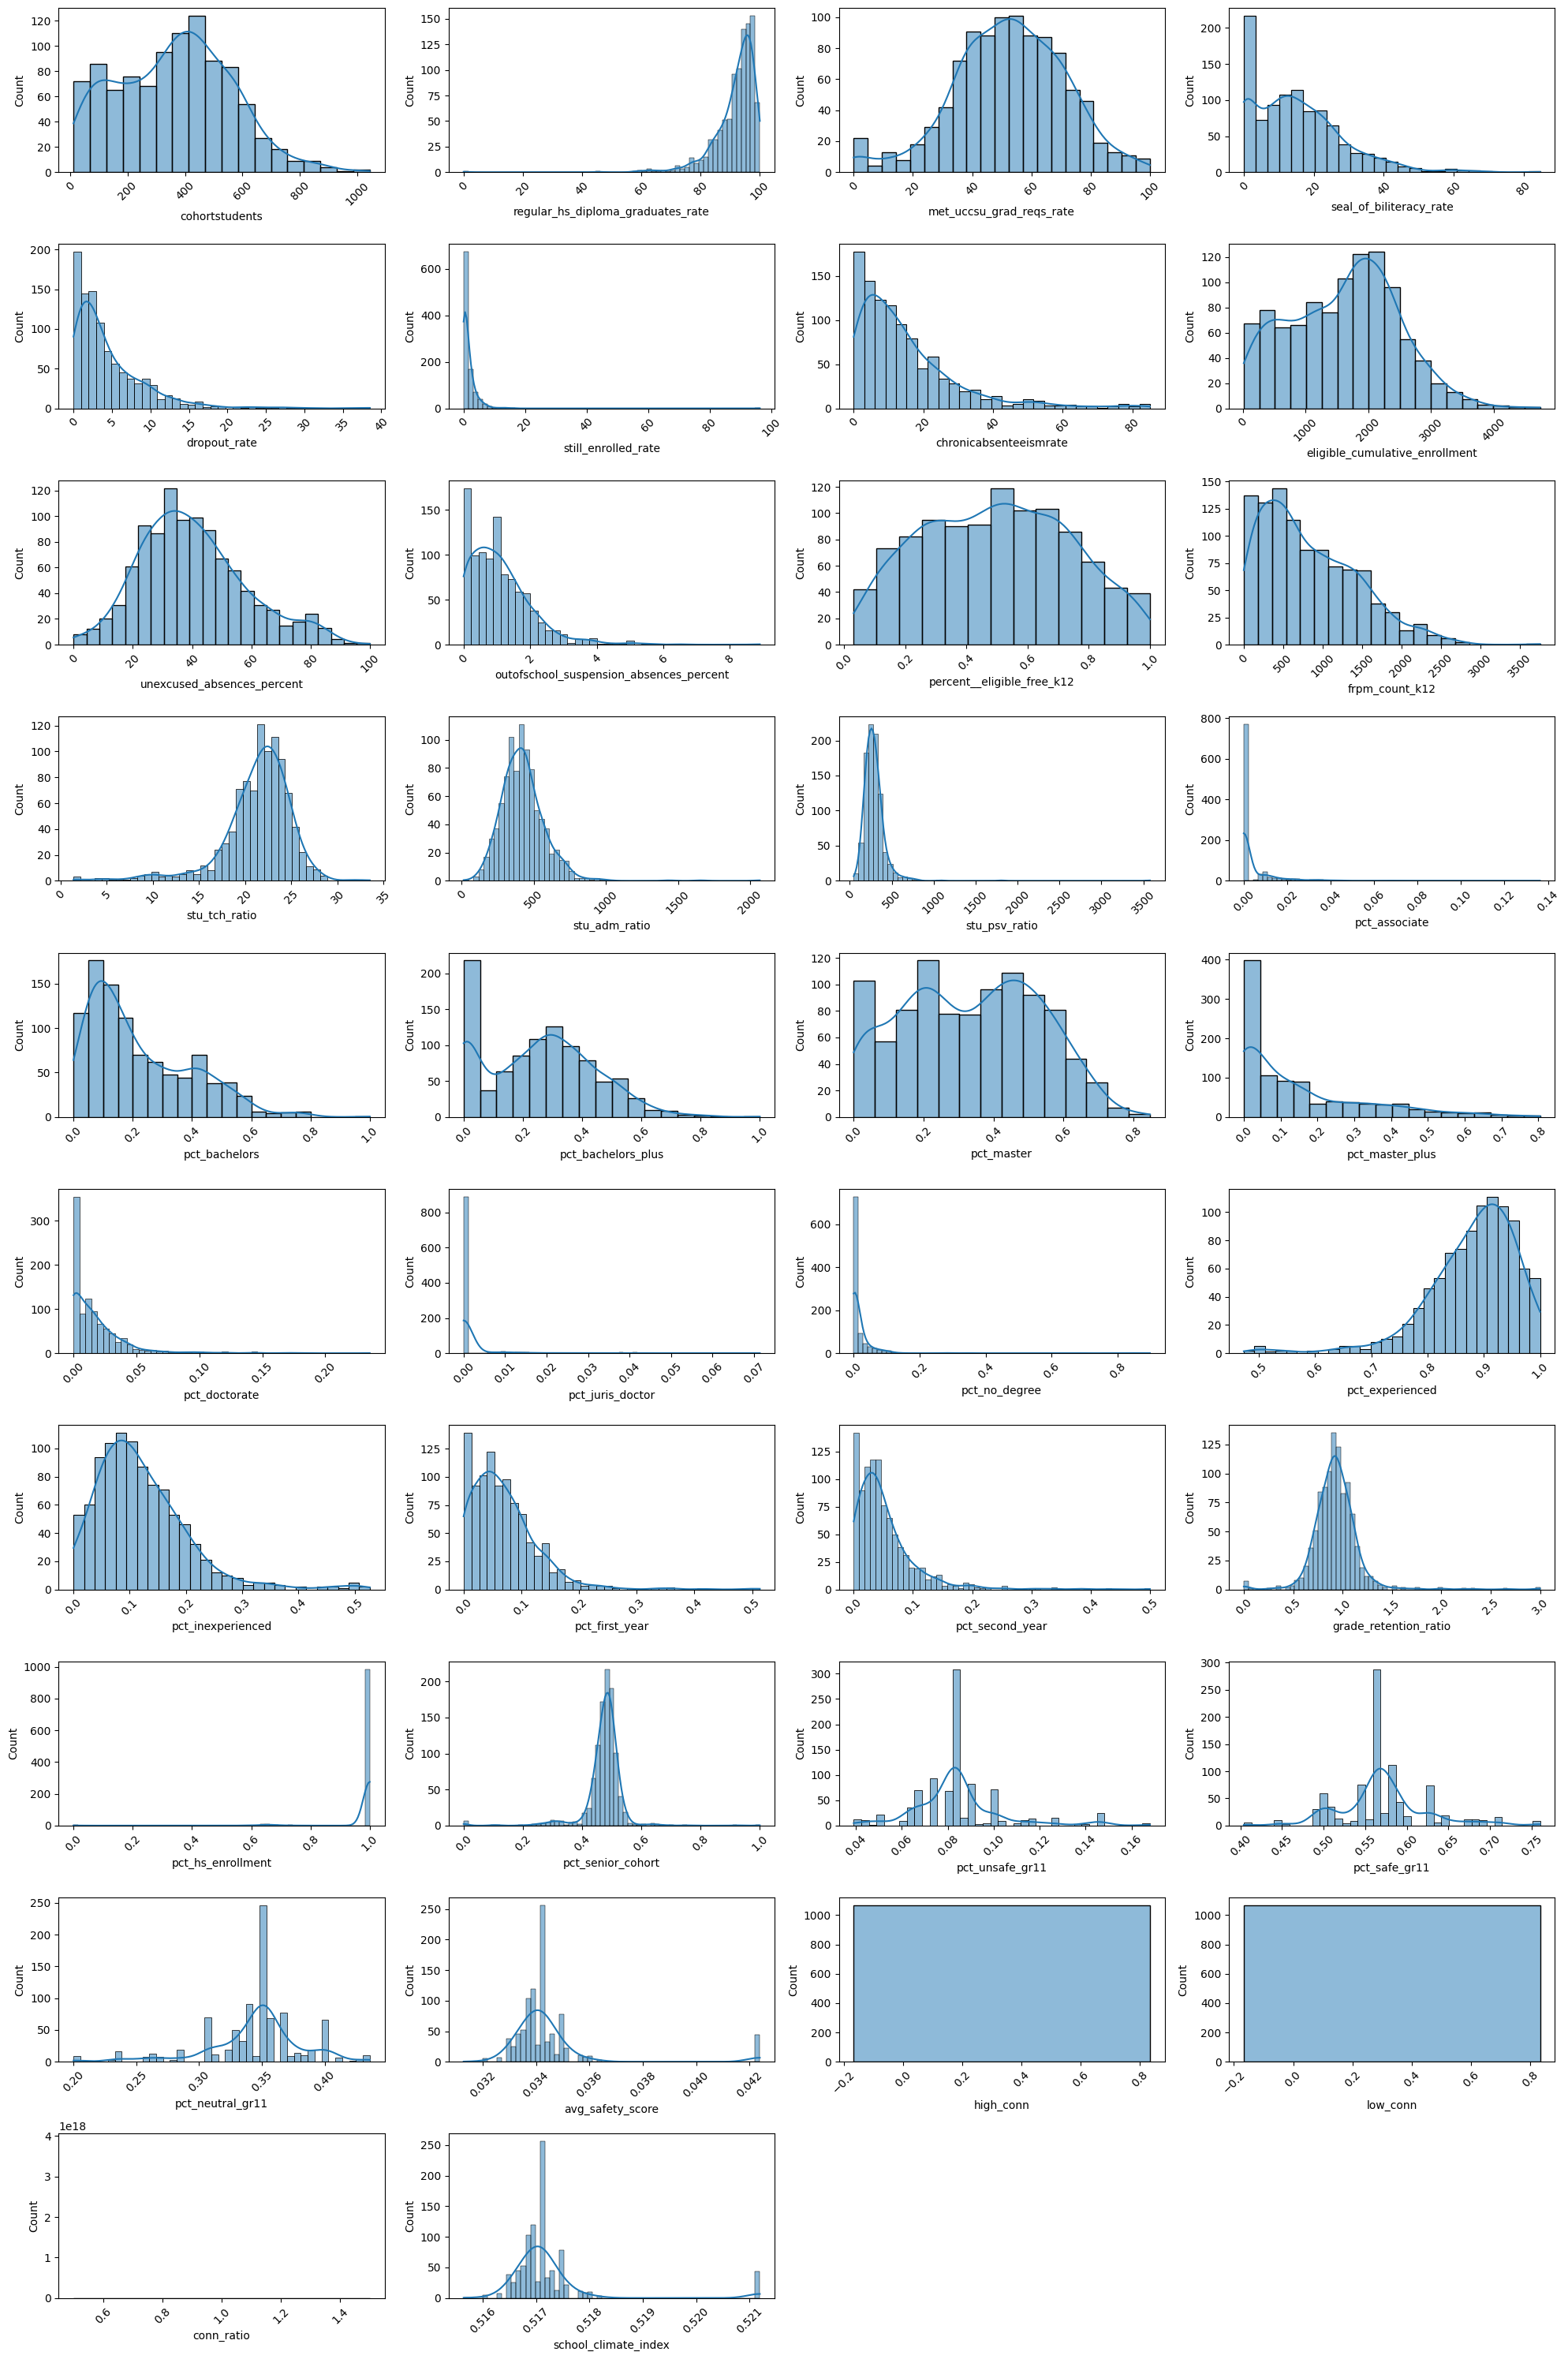

In [79]:
n_cols = 4
n_rows = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(num_cols[: n_cols * n_rows]):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].tick_params(axis="x", rotation=45)

# hide unused subplots if there are fewer features than grid spots
for j in range(i + 1, n_cols * n_rows):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

### Box Plots

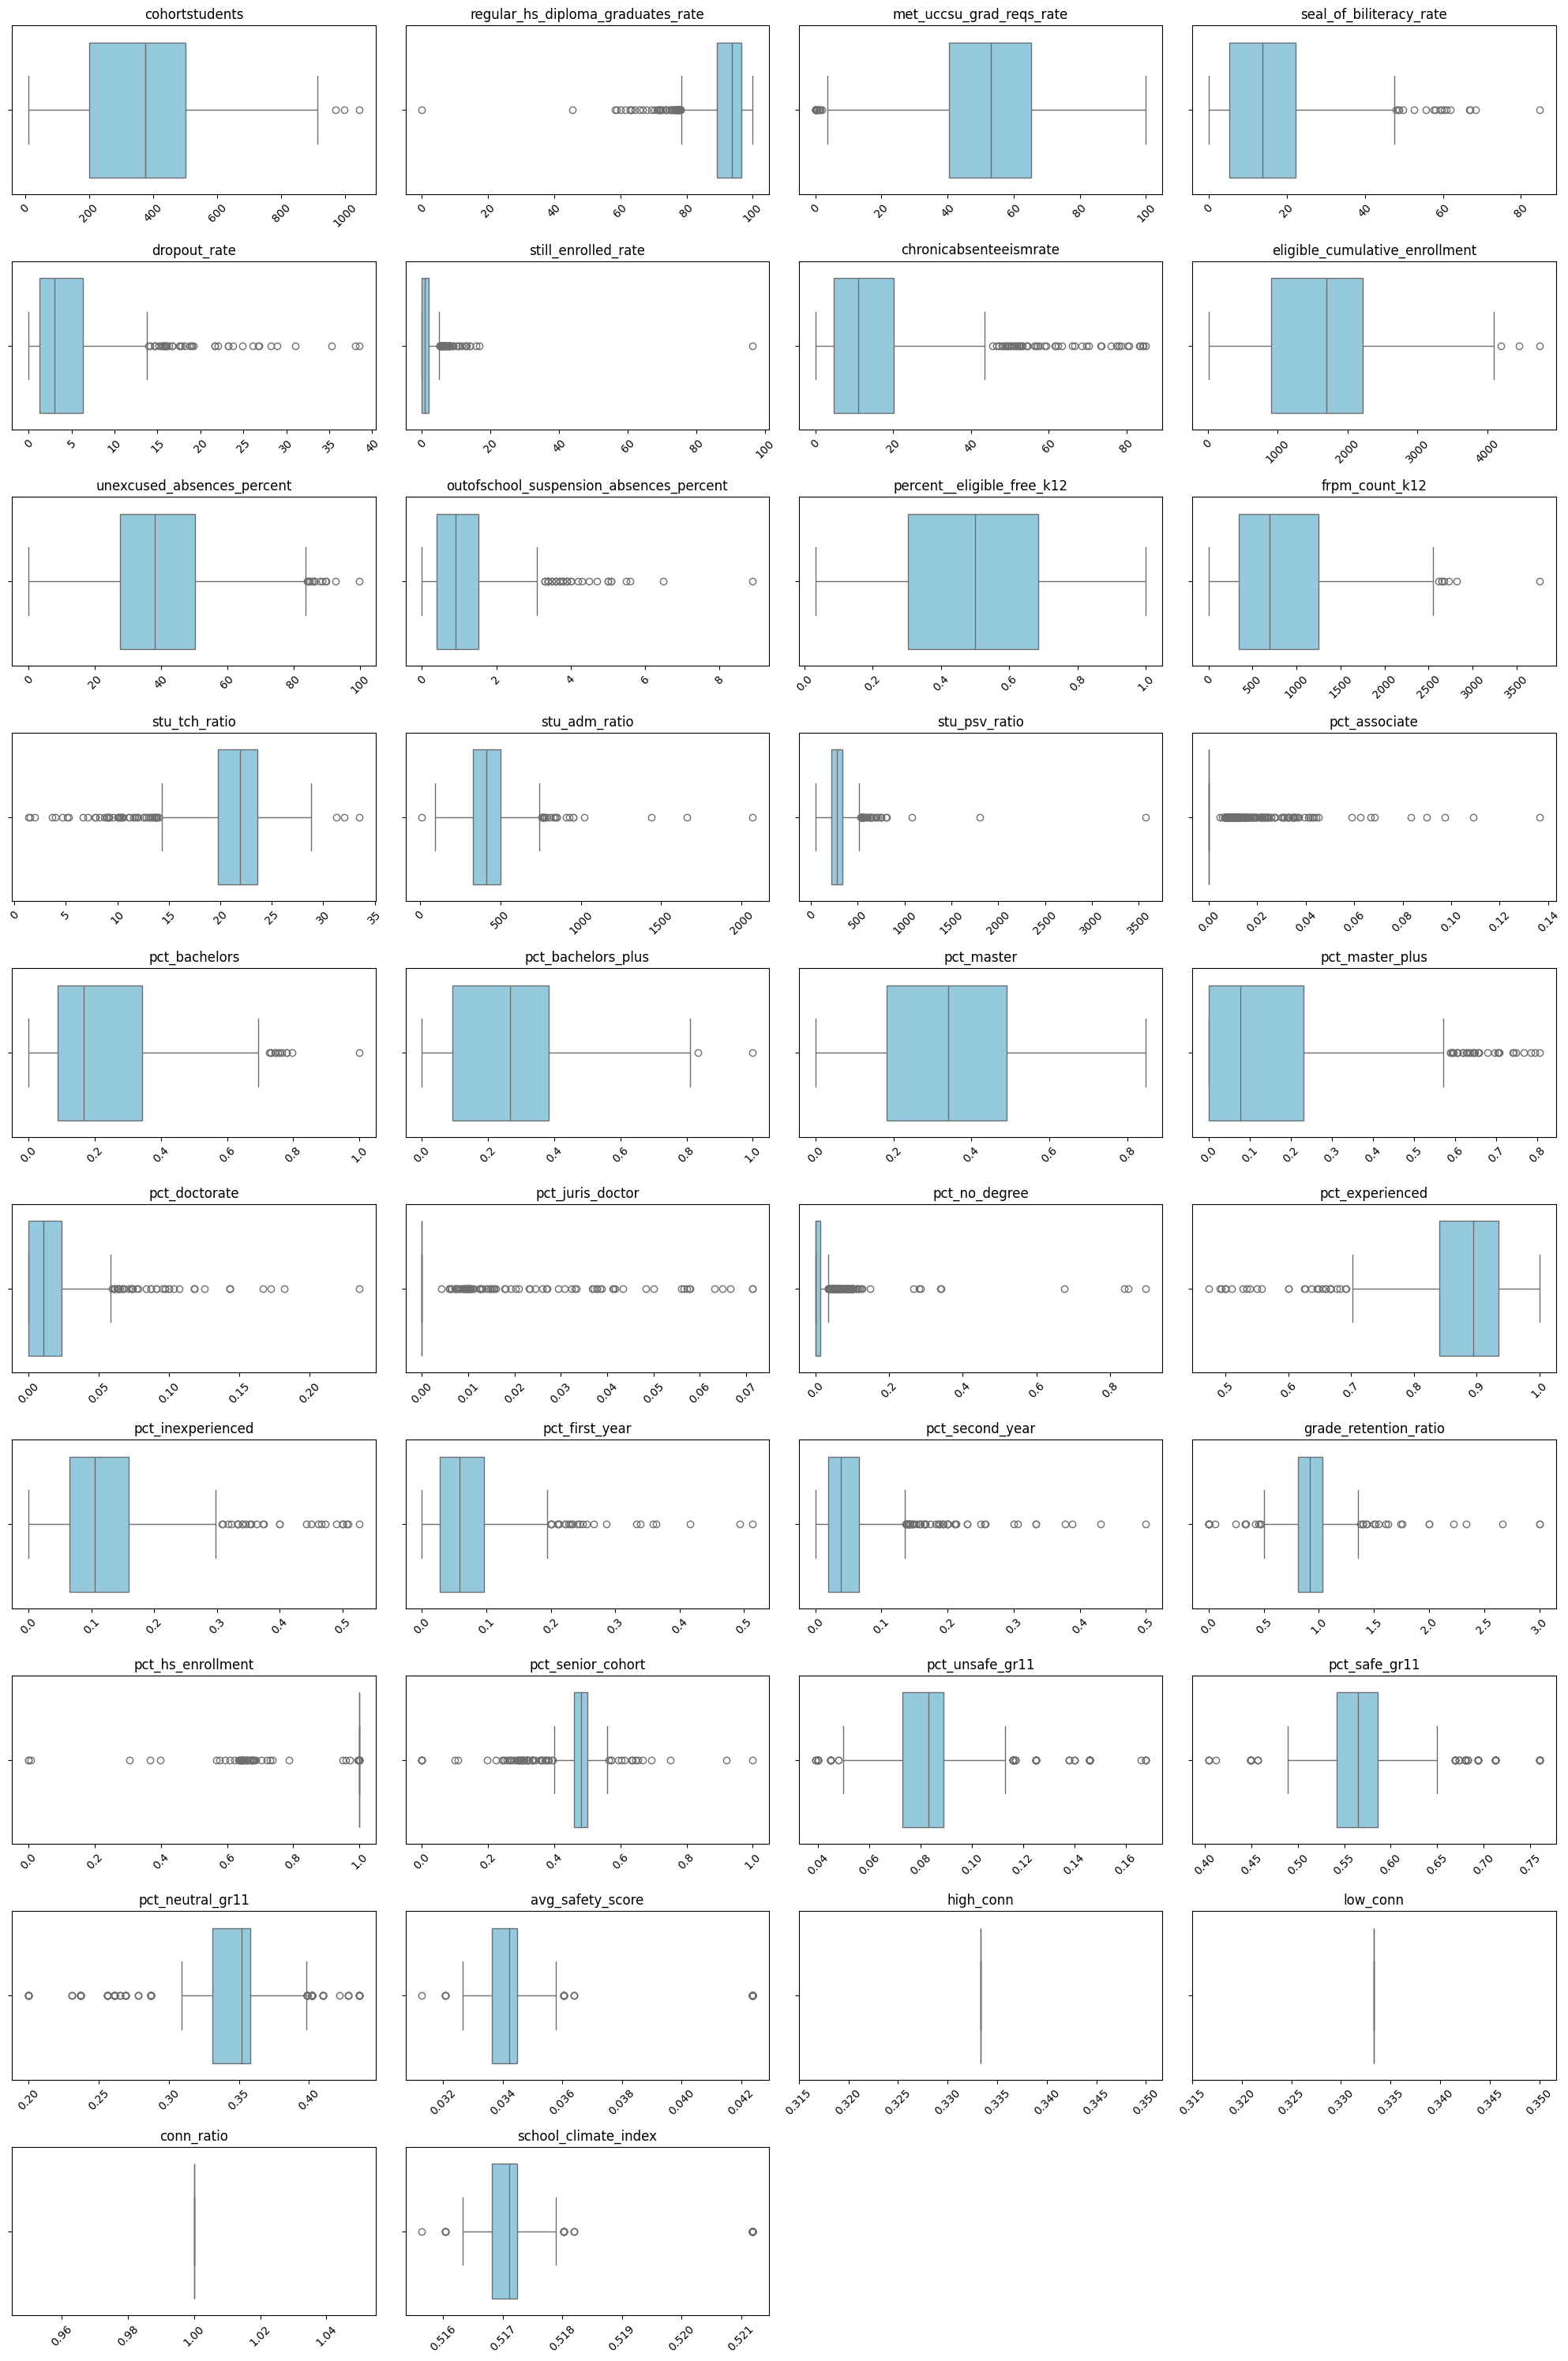

In [78]:
n_cols = 4
n_rows = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(num_cols[: n_cols * n_rows]):
    sns.boxplot(x=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(col)
    axes[i].set_xlabel('')
    axes[i].tick_params(axis="x", rotation=45)

# hide unused subplots if there are fewer features than grid spots
for j in range(i + 1, n_cols * n_rows):
    axes[j].set_visible(False)
    
plt.tight_layout()
plt.show()

### Kernel Density (KDE) Plots

/tmp/ipykernel_386414/3174651077.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, ax=axes[i])
/tmp/ipykernel_386414/3174651077.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(df[col], fill=True, ax=axes[i])


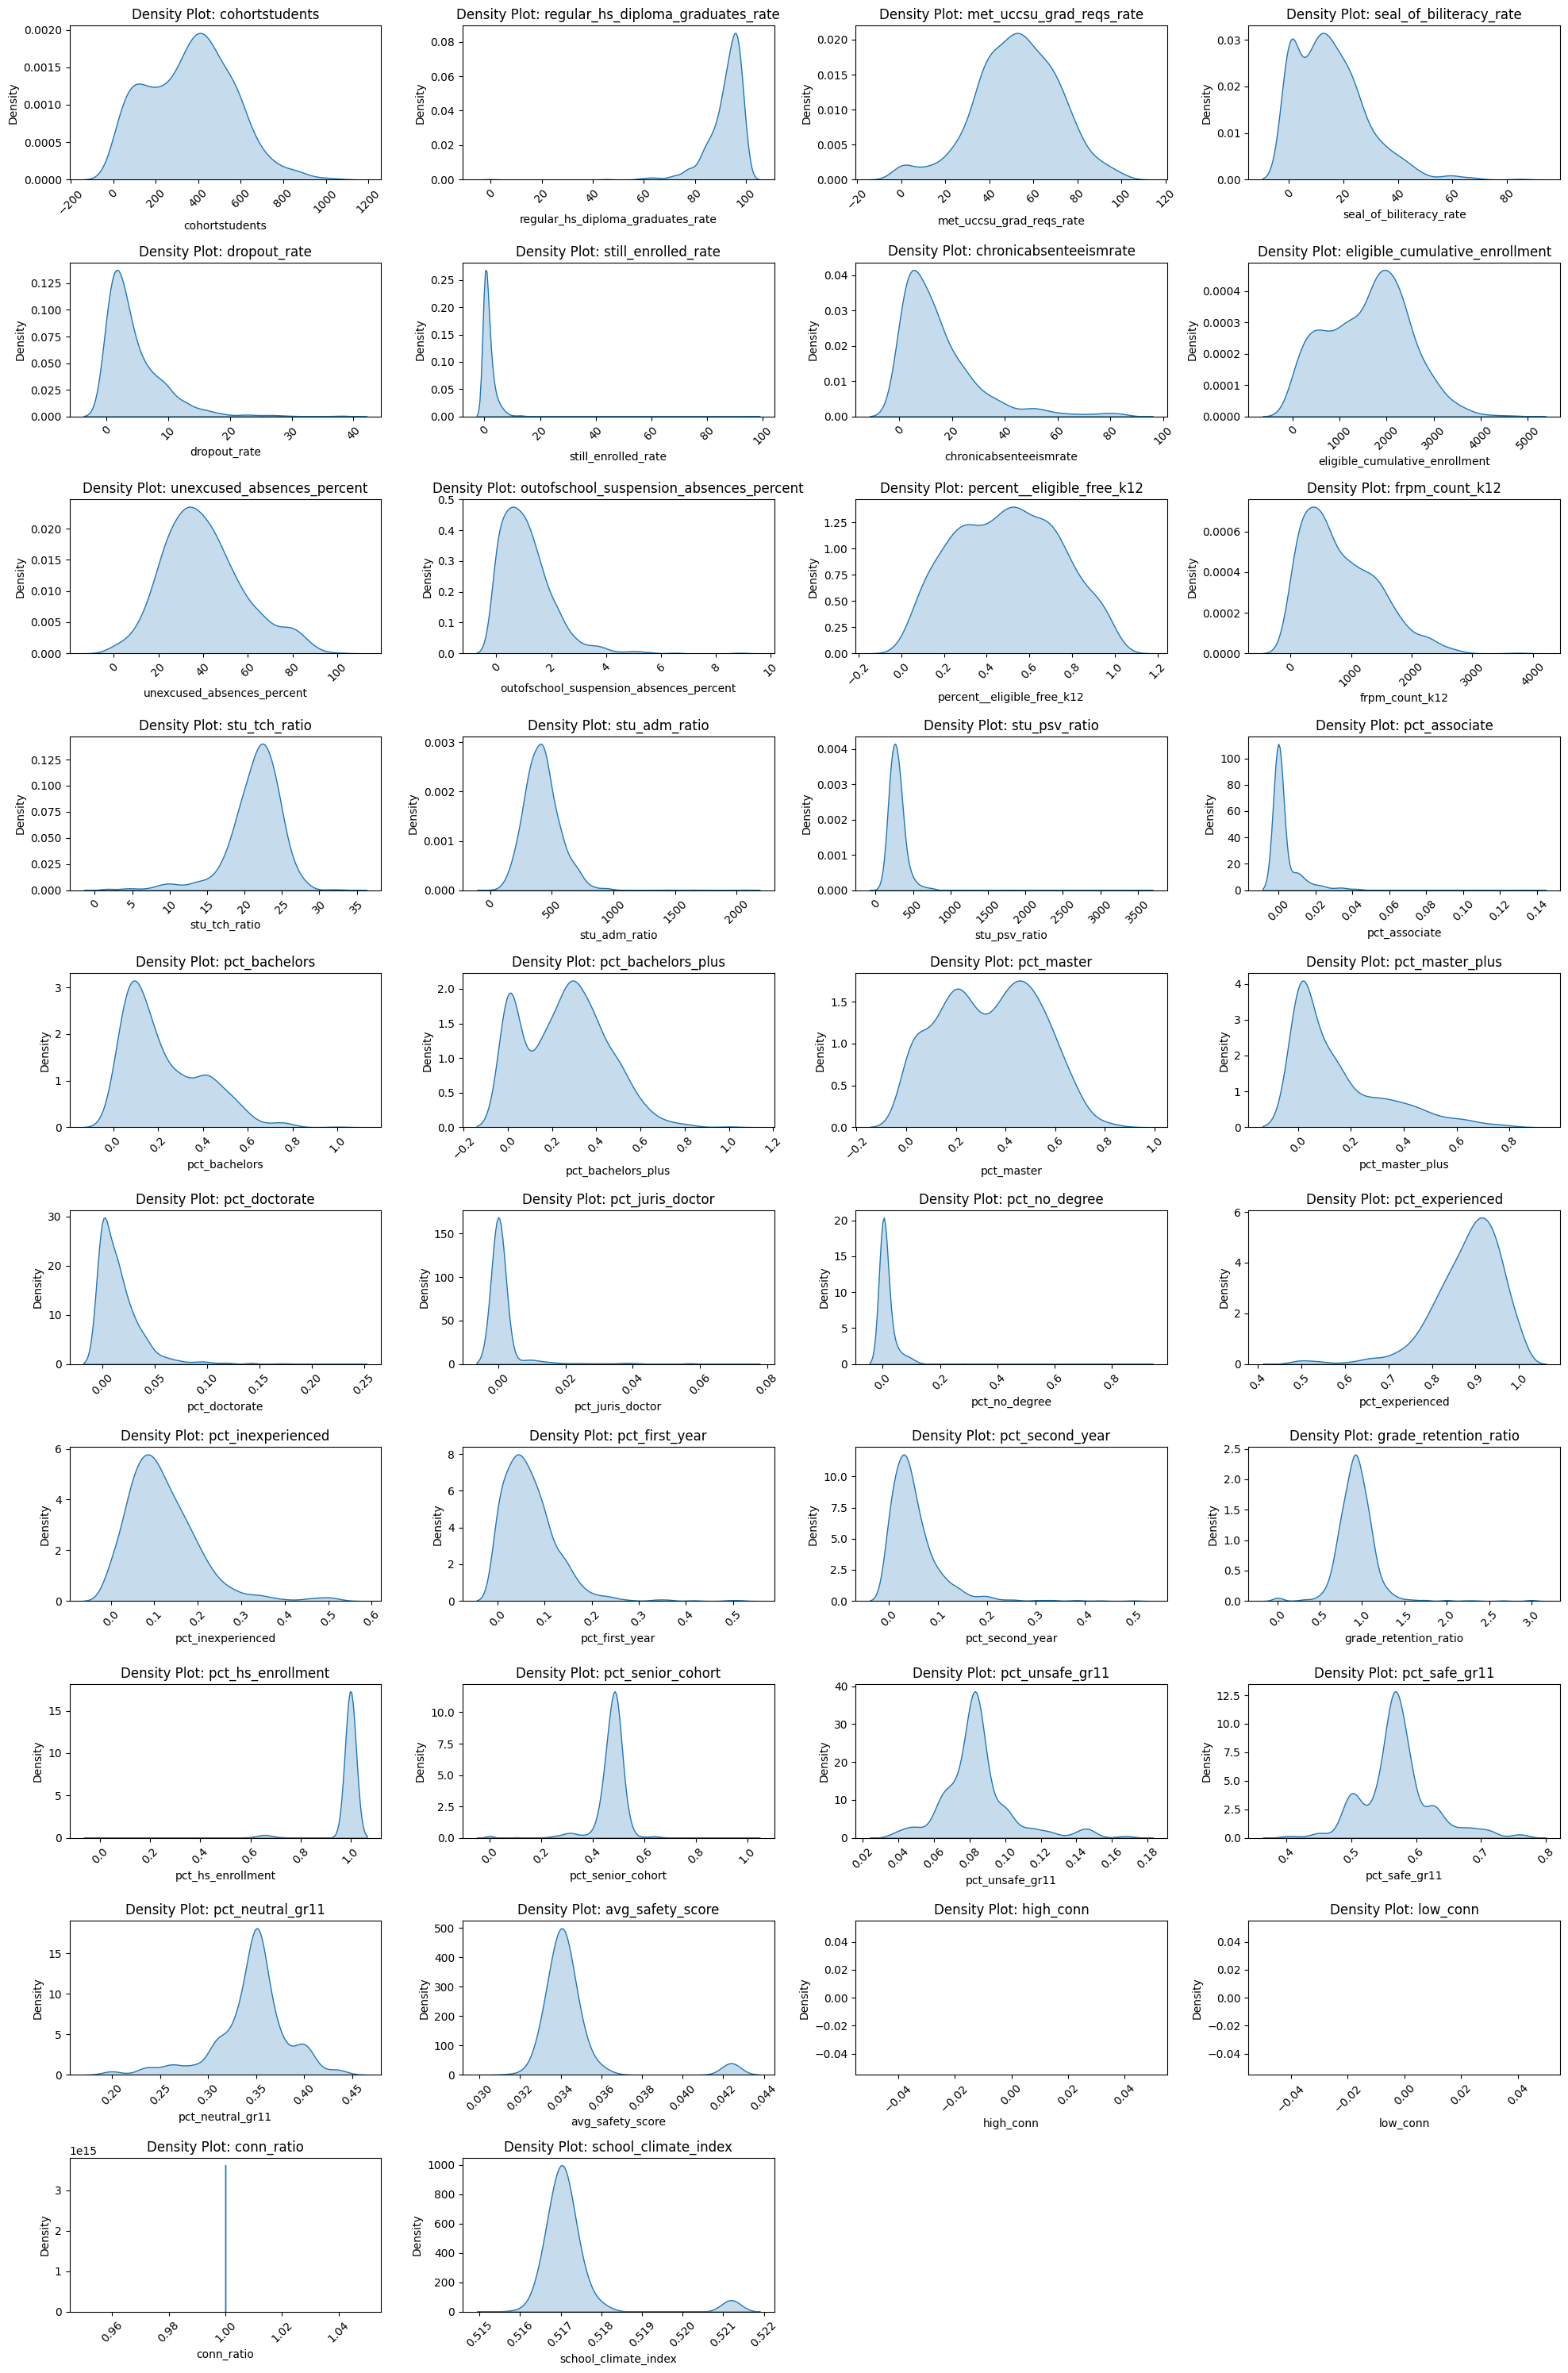

In [77]:
# for col in num_cols:
#     sns.kdeplot(df[col], fill=True)
#     plt.title(f'Density Plot: {col}')
#     plt.show()


n_cols = 4
n_rows = 10

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(num_cols[: n_cols * n_rows]):
    sns.kdeplot(df[col], fill=True, ax=axes[i])
    axes[i].set_title(f'Density Plot: {col}')
    axes[i].tick_params(axis="x", rotation=45)

# hide unused subplots if there are fewer features than grid spots
for j in range(i + 1, n_cols * n_rows):
    axes[j].set_visible(False)


plt.tight_layout()
plt.show()

In [74]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR))).sum()
outliers.sort_values(ascending=False)

pct_associate                              201
pct_neutral_gr11                           165
pct_no_degree                              123
pct_unsafe_gr11                             89
pct_juris_doctor                            82
pct_safe_gr11                               75
pct_senior_cohort                           70
still_enrolled_rate                         65
school_climate_index                        63
avg_safety_score                            63
pct_second_year                             56
chronicabsenteeismrate                      54
pct_hs_enrollment                           52
stu_tch_ratio                               52
regular_hs_diploma_graduates_rate           48
dropout_rate                                44
pct_doctorate                               42
grade_retention_ratio                       36
pct_master_plus                             33
outofschool_suspension_absences_percent     33
stu_psv_ratio                               33
pct_experienc

## Categorical Features